# Adding dependencies

In [1]:
import sys
from distutils.version import LooseVersion

if LooseVersion(sys.version) < LooseVersion('3.8'):
    print('[FAIL] We recommend Python 3.8 or newer but'
          ' found version %s' % (sys.version))
else:
    print('[OK] Your Python version is %s' % (sys.version))


def get_packages(pkgs):
    versions = []
    for p in pkgs:
        try:
            imported = __import__(p)
            try:
                versions.append(imported.__version__)
            except AttributeError:
                try:
                    versions.append(imported.version)
                except AttributeError:
                    try:
                        versions.append(imported.version_info)
                    except AttributeError:
                        versions.append('0.0')
        except ImportError:
            print(f'[FAIL]: {p} is not installed and/or cannot be imported.')
            versions.append('N/A')
    return versions


def check_packages(d):

    versions = get_packages(d.keys())

    for (pkg_name, suggested_ver), actual_ver in zip(d.items(), versions):
        if actual_ver == 'N/A':
            continue
        actual_ver, suggested_ver = LooseVersion(actual_ver), LooseVersion(suggested_ver)
        if actual_ver < suggested_ver:
            print(f'[FAIL] {pkg_name} {actual_ver}, please upgrade to >= {suggested_ver}')
        else:
            print(f'[OK] {pkg_name} {actual_ver}')


if __name__ == '__main__':
    d = {
        'numpy': '1.21.2',
        'scipy': '1.7.0',
        'matplotlib': '3.4.3',
        'sklearn': '1.0',
        'pandas': '1.3.2'
    }
    check_packages(d)


C:\Users\sebas\AppData\Local\Temp\ipykernel_23424\2612967777.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(sys.version) < LooseVersion('3.8'):


[OK] Your Python version is 3.11.1 (tags/v3.11.1:a7a450f, Dec  6 2022, 19:58:39) [MSC v.1934 64 bit (AMD64)]
[OK] numpy 1.24.2
[OK] scipy 1.10.1
[OK] matplotlib 3.7.1
[OK] sklearn 1.2.2
[OK] pandas 1.5.3


C:\Users\sebas\AppData\Local\Temp\ipykernel_23424\2612967777.py:39: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  actual_ver, suggested_ver = LooseVersion(actual_ver), LooseVersion(suggested_ver)


In [2]:
import sys
sys.path.insert(0, '..')

d = {
    'numpy': '1.21.2',
    'matplotlib': '3.4.3',
    'torch': '1.9.0',
}
check_packages(d)

[OK] numpy 1.24.2
[OK] matplotlib 3.7.1
[OK] torch 2.0.0+cpu


C:\Users\sebas\AppData\Local\Temp\ipykernel_23424\2612967777.py:39: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  actual_ver, suggested_ver = LooseVersion(actual_ver), LooseVersion(suggested_ver)


# Opgave 1 

## Opgave 1.A	Lidt mere om  tensorer

## Imports

In [3]:
import torch
import pandas as pd
import numpy as np

Antag at følgende tensor er defineret: 

In [4]:
numbers = torch.tensor([23, 57, 10, 10, 12, 35, 2, 74, 302, 10])
print(numbers)

tensor([ 23,  57,  10,  10,  12,  35,   2,  74, 302,  10])


Beregn: 
- mean = ?
- median = ?
- standard_devation = ?
- sorted_numbers = ?
- numbers_sum = ?


In [5]:
print(torch.mean(numbers, dtype=float))
print(torch.median(numbers))
print(torch.std(numbers))
print(torch.sort(numbers))
print(torch.sum(numbers))

tensor(53.5000, dtype=torch.float64)
tensor(12)


TypeError: std() received an invalid combination of arguments - got (Tensor, dtype=type), but expected one of:
 * (Tensor input, tuple of ints dim, bool unbiased, bool keepdim, *, Tensor out)
 * (Tensor input, tuple of ints dim, *, int correction, bool keepdim, Tensor out)
 * (Tensor input, bool unbiased)
      didn't match because some of the keywords were incorrect: dtype
 * (Tensor input, tuple of names dim, bool unbiased, bool keepdim, *, Tensor out)
 * (Tensor input, tuple of names dim, *, int correction, bool keepdim, Tensor out)


## Opgave 1.B

En virksomhed har to afdelinger: A og B med hver 3 medarbejdere. 
Het følger data for antal timer samt timeløn for de to afdelinger (de tre første tal er for afdeling A og de tre sidste for afdeling B):

- salary = torch.tensor([1, 10, 100, 2, 20, 200])
- hours = torch.tensor([5, 10, 15, 51, 100, 150])

### 1 - Opret 2 tensorer
Opret de to tensorer og undersøg deres størrelse/dimension samt datatype.




### 2 - Organiser tensorer 
Virksomheden vil gerne have at data er organiseret i en tabel i stedet for en liste så de bliver udskrevet som vist her:

- print(salary)
- print ( hours)

m. følgende tensorer
- tensor([[ 1, 100, 200], [ 2, 20, 200]])
- tensor([[ 5, 10, 15], [51, 100, 150]])

Ændr på de to tensorer så det er opfyldt.

### 3 - Undersøg dimensioner
Undersøg deres størrelse/dimension

Konstruer en ny tensor, amount, som indeholder hver medarbejders samlede løn som vist her:
- print(amount.shape)
- tensor([ 
  - [   5,  100,  1500], 
  - [ 102, 2000, 30000]])

### 4 - Opret Amount som 3-dimensional
Som eksperiment vil man gerne have at amount er 3-dimensional så den kan indeholde lønudbetalinger for flere perioder. Altså så følgende er opfyldt:
- print(amount.shape)
- torch.Size([1,2,3])

Foretag den ønskede ændring på amount og tjek at det virker korrekt

### 5 - Ændre amount fra 3-dimensional til 2-dimensional
Man fortryder og vil gerne tilbage til de to dimensioner fra tidligere.
- Foretag den ønskede ændring på amount og tjek at det virker korrekt

### 6  Beregn sum fra Amount iht. medarbejder1, medarbejder2 og medarbejder 3
Man ønsker udfra amount at beregne sum samt gennemsnit for medarbejder1, medarbejder2 og medarbejder3.
- Konstruer – udfra amount – to tensorer medarb_gns og medarb_sum så de får følgende værdier:
   - print(medarb_gns)
   - tensor([53.500, 1050.0000, 15750.0000])
   - print(medarb_sum)
   - tensor([ 107., 2100., 31500.,] 

### 7  - Beregn gennemsnit og sum for den på gældende afdeling
Man ønsker samme beregninger for de to afdelinger.
- Konstruer – udfra amount – to tensorer afd_gns og afd_sum så de får følgende værdier:
   - print(afd_gns)
   - tensor([ 535.0000, 10700.6670])
   - print(afd_sum)
   - tensor([ 1605., 32102.])
7


### 8 - Beregn Total lønsum
Og endelig ønskes den totale lønsum
- Konstruer – udfra amount – tensoren sum så den får følgende værdi:
  - print(sum)
  - tensor(33707.)

### 9 - Find fejlen og ret den
En medarbejder forsøger at beregne amount således: amount = torch.matmul(salary, hours), men får en fejlmeddelelse: 
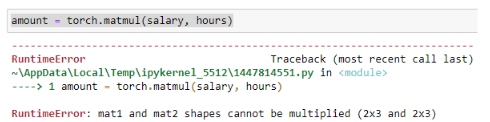

#### Opgave
Forklar ham hvad fejlen betyder og hjælp ham så ham kan udføre beregningen af amount ved hjælp af torch.matmul() og salary samt hours.


### 9.B - Forklar hvorfor det ikke er korrekte at udregne det på denne måde
Forklar ham også hvorfor det ikke er den korrekte måde at beregne amount på

## 1.C - Ændrer tensor fra 3 dimensional til 1 dimensional med 3 elementer
Givet en tensor:
- b = torch.tensor([10,20,30])
  - tensor[10,20,30]

Hvordan skal b ændres så følgende bliver opfyldt:
- tensor([
  - [10],
  - [20],
  - [30]])

# Opgave 2	Refleksionsspørgsmål
- Hvad er forskellen på 	amount = salary * hours 
og 	amount = torch.multiply(salary, hours)?


- Hvad er en pipeline i PyTorch og hvorfor er det rigtig smart?


- Hvad er et Dataset og hvad bruges det til?


- Hvad er en DataLoader og hvad bruges den til?


- Hvorfor er det nu at det er smart at arbejde med batches?


- Hvad er formålet med at anvende shuffle


- Hvad er transformations og hvad anvendes det til?



Giv eksempler.
- Hvad er formål/fordel ved at normalisere data ved at trække gennemsnit fra og dividere med standardafvigelsen? (se fx p. 391 i bogen)
- Forklar forskellen og formålet med de tre typer af dataset: train, valid og test
- Har du undret dig over hvad requires_grad_() gør (se fx p. 392 i bogen)?

Slå den op, men spekuler ikke alt for meget – vi kommer til bage til den senere.
- Hvad er det nu stochastic gradient decent er? Bare i grove træk…
- torch.autograd.backward og weight.grad.zero_() nævnes p. 392 i bogen, men det skal du ikke reflektere over nu – vi kommer tilbage til dem 😊
- Du husker vel hvad learning rate og epoch betyder…

# Opgave 3 - Join tensorer

## 3.A - Konstruer tensorer
Givet to tensorer X og y med følgende værdier:
- tensor([
  - [ 1, 10, 100],
  - [ 2, 20, 200],
  - [ 3, 30, 300]]
- tensor([ 0.1000, 0.2000, 0.3000])

Konstruer de to tensorer X og y:

## 3.B - Anvend JointDataset til at joine 2 tensorer
Anvend klassen JointDataset p. 379-380 i bogen og konstruer et objekt ud fra ovennævnte tensorer så følgende opnås:
- for example in dataset:
  - print(' X: ', example[0], 'y: ', example[1])

  - X: tensor [ 1, 10, 100], y: tensor(0,1000)
  - X: tensor [ 2, 20, 200], y: tensor(0,2000)
  - X: tensor [ 3, 30, 300], y: tensor(0,3000)


# Opgave 4 - Eksperimenter med at bygge en pipeline

I filen pima.csv finder du ”Pima Indians onset of diabetes dataset” som indeholder helbredsdata for 768 Pima indianere samt hvorvidt de har begyndende diabetes.  Det er et binært klassifikationsproblem med 8 inputvariable og en outputvariabel (sidste kolonne):
```
Input Varibles (X)
1. Number of times pregnant
2. Plasma Glucose concentraton at 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-hour serum insulin (μlU/ml)
6. Body mass index (weight in kg(height in m)2)
7. Diabetes pedigree function
8. Age (years)

Output Variables (y):
- Class label(0 or 1)
```


Datasættet kan indlæses i et numpy array således:

Du får brug for at
- Splitte arrayet i to (input og output)
- Konvertere de to arrays til tensor med rette dimension og type
- Definere modellen (fx en Sequential model med fully connected layers)   Herunder:
  - definer antal lag og deres indbyrdes dimension
  - Vælge activation function for hvert lag
- Definere loss function (da det er et binært klassifikationsproblem er binary cross entropy (nn.BCELoss()) velegnet)
- Definere optimizer (fx optim.Adam)
- Vælge størrelse på epochs og batch-size
- Træne modellen (definere træningsloopet)
- Evaluere modellen (her vil accuracy være velegnet – overvej hvorfor?)
- Måske skal vi også have valideringdata…??
- Eksperimentere med alt hvad der kan ændres.

Hvem får det bedste resultat?

# Opsamling / Outro (5 minutter) 
- Var der noget vi ikke nåede eller ikke fik behandlet tilstrækkeligt? 
- Var det svært / nemt? 
- Lærte du tilstrækkeligt i dag? 
- Hvis nej: Hvad var årsagen?
- Andet og næste gang…
